<a href="https://colab.research.google.com/github/Chhaya-cloud/Chatbot/blob/main/MNIST1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import tensorflow  as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import confusion_matrix, classification_report

import warnings
from warnings import filterwarnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
filterwarnings("ignore")


In [7]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import load_model

(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [8]:
# Check data types
print(f" x_train type: {type(X_train)}")
print(f" y_train type: {type(y_train)}")
print(f" x_test type: {type(X_test)}")
print(f" y_test type: {type(y_test)}")

 x_train type: <class 'numpy.ndarray'>
 y_train type: <class 'numpy.ndarray'>
 x_test type: <class 'numpy.ndarray'>
 y_test type: <class 'numpy.ndarray'>


In [10]:
# Check shapes of the datasets
print(f" x_train shape: {X_train.shape}")
print(f" y_train shape: {y_train.shape}")
print(f" x_test shape: {X_test.shape}")
print(f" y_test shape: {y_test.shape}\n")

 x_train shape: (60000, 28, 28)
 y_train shape: (60000,)
 x_test shape: (10000, 28, 28)
 y_test shape: (10000,)



In [11]:
# Check unique values in target variables
print(f"Unique values in y_train: {np.unique(y_train)}")
print(f"Unique values in y_test: {np.unique(y_test)}\n")

# Check if  there is any missing data
print(f"Any missing values in x_train: {np.any(np.isnan(X_train))}")
print(f"Any missing values in y_train: {np.any(np.isnan(y_train))}")
print(f"Any missing values in x_test: {np.any(np.isnan(X_test))}")
print(f"Any missing values in y_test: {np.any(np.isnan(y_test))}")

Unique values in y_train: [0 1 2 3 4 5 6 7 8 9]
Unique values in y_test: [0 1 2 3 4 5 6 7 8 9]

Any missing values in x_train: False
Any missing values in y_train: False
Any missing values in x_test: False
Any missing values in y_test: False


In [12]:
num_classes = len(np.unique(y_train))
print(f"Number of classes: {num_classes}")

Number of classes: 10


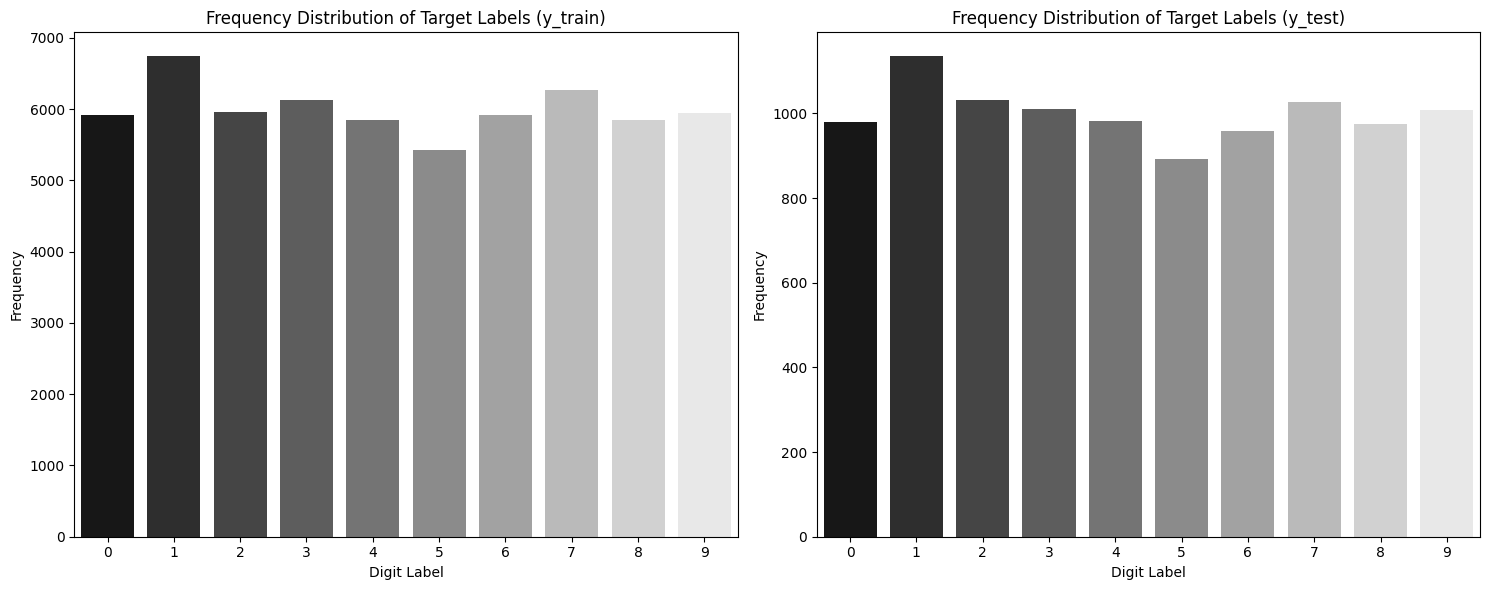

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

sns.countplot(x=y_train, palette='gray', ax=axes[0])
axes[0].set_title('Frequency Distribution of Target Labels (y_train)')
axes[0].set_xlabel('Digit Label')
axes[0].set_ylabel('Frequency')

sns.countplot(x=y_test, palette='gray', ax=axes[1])
axes[1].set_title('Frequency Distribution of Target Labels (y_test)')
axes[1].set_xlabel('Digit Label')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

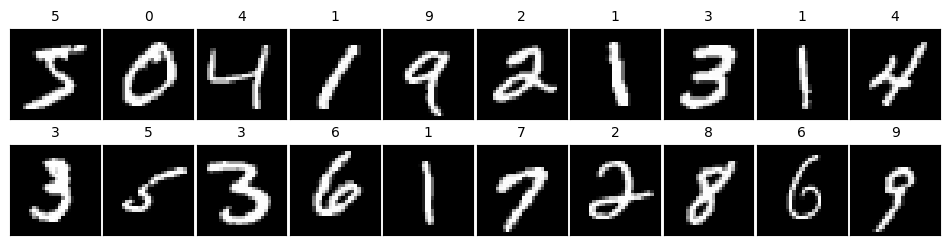

In [17]:
def visualize_images(data):
    fig, axes = plt.subplots(nrows=2, ncols=10, figsize=(12,3),
                             gridspec_kw={'wspace':0.04, 'hspace':0.01},
                             squeeze=True)

    for i, ax in enumerate(axes.flat):
        # Changed x_train to X_train
        ax.imshow(X_train[i], cmap='gray')
        ax.set_xticks([]), ax.set_yticks([])
        ax.set_title(str(y_train[i]), fontsize=10)

    plt.tight_layout()
    plt.show()

# Changed x_train to X_train
visualize_images(X_train)

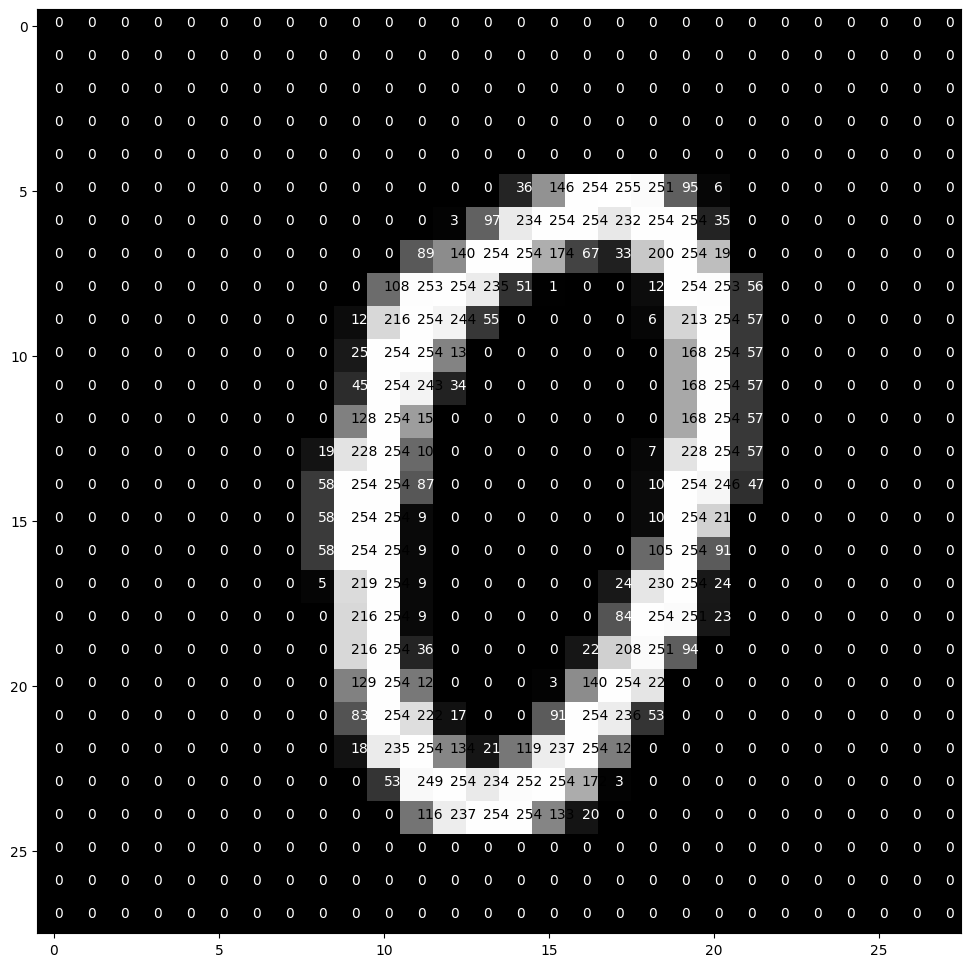

In [18]:
def pixel_visualize(img):
    fig = plt.figure(figsize=(12,12))
    ax = fig.add_subplot(111)
    ax.imshow(img, cmap="gray")
    width, height = img.shape
    threshold = img.max()/2.5
    for x in range(width):
        for y in range(height):
            ax.annotate(str(round(img[x][y], 2)), xy=(y,x),
                       color='white' if img [x][y]<threshold else 'black')

pixel_visualize(X_train[1000])

In [19]:
y_train[0:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [20]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [21]:
y_train[0:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]])

In [24]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [25]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

X_train shape: (60000, 28, 28, 1)
X_test shape: (10000, 28, 28, 1)


In [28]:
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255

model = Sequential()

model.add(Conv2D(32, (3,3), padding='same', activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(optimizer=Adam(learning_rate=0.001),
             loss='categorical_crossentropy',
             metrics=[tf.keras.metrics.Precision(), tf.keras.metrics.Recall(), "accuracy"])

In [29]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 26, 26, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 13, 13, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 11, 11, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 5, 5, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       819,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 892,266 (3.40 MB)

 Trainable params: 891,050 (3.40 MB)

 Non-trainable params: 1,216 (4.75 KB)

In [30]:
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=False,
    fill_mode='nearest'
)
datagen.fit(X_train)

In [31]:
early_stopping = EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True)
history = model.fit(datagen.flow(X_train, y_train, batch_size=512), epochs=5,
                    validation_data=(X_test, y_test), callbacks=[early_stopping])

Epoch 1/5
118/118 ━━━━━━━━━━━━━━━━━━━━ 247s 2s/step - accuracy: 0.2110 - loss: 2.1347 - precision: 0.4896 - recall: 0.0505 - val_accuracy: 0.1010 - val_loss: 2.3703 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/5
118/118 ━━━━━━━━━━━━━━━━━━━━ 227s 2s/step - accuracy: 0.7126 - loss: 0.8977 - precision: 0.8130 - recall: 0.6058 - val_accuracy: 0.0974 - val_loss: 5.7359 - val_precision: 0.0974 - val_recall: 0.0974
Epoch 3/5
118/118 ━━━━━━━━━━━━━━━━━━━━ 208s 2s/step - accuracy: 0.7981 - loss: 0.6374 - precision: 0.8570 - recall: 0.7424 - val_accuracy: 0.0974 - val_loss: 11.8841 - val_precision: 0.0974 - val_recall: 0.0974
Epoch 4/5
118/118 ━━━━━━━━━━━━━━━━━━━━ 216s 2s/step - accuracy: 0.8364 - loss: 0.5290 - precision: 0.8828 - recall: 0.7937 - val_accuracy: 0.1010 - val_loss: 19.0636 - val_precision: 0.1010 - val_recall: 0.1010
Epoch 5/5
118/118 ━━━━━━━━━━━━━━━━━━━━ 210s 2s/step - accuracy: 0.8562 - loss: 0.4700 - precision: 0.8929 - recall: 0.8223 - val_accuracy: 0.1010 - va

In [32]:
y_pred = model.predict(X_test)
y_pred_class = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 30ms/step


In [33]:
class_labels = ['0','1','2','3','4','5','6','7','8','9']
report = classification_report(y_true, y_pred_class, target_names=class_labels)
print(report)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       980
           1       0.00      0.00      0.00      1135
           2       0.00      0.00      0.00      1032
           3       0.10      1.00      0.18      1010
           4       0.00      0.00      0.00       982
           5       0.00      0.00      0.00       892
           6       0.00      0.00      0.00       958
           7       0.00      0.00      0.00      1028
           8       0.00      0.00      0.00       974
           9       0.00      0.00      0.00      1009

    accuracy                           0.10     10000
   macro avg       0.01      0.10      0.02     10000
weighted avg       0.01      0.10      0.02     10000



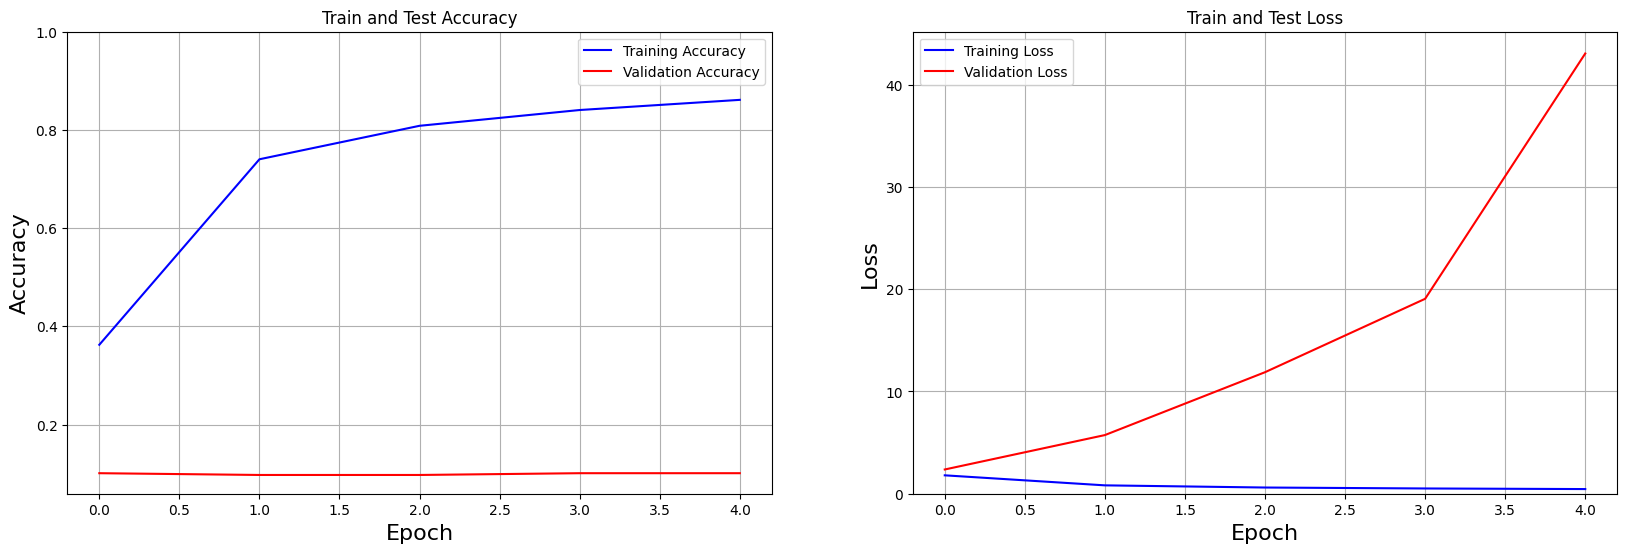

In [34]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], color='b', label='Training Accuracy')
plt.plot(history.history['val_accuracy'], color='r', label='Validation Accuracy')
plt.legend()
plt.xlabel('Epoch', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
plt.ylim([min(plt.ylim()),1])
plt.title('Train and Test Accuracy')
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(history.history['loss'], color='b', label='Training Loss')
plt.plot(history.history['val_loss'], color='r', label='Validation Loss')
plt.legend()
plt.xlabel('Epoch', fontsize=16)
plt.ylabel('Loss', fontsize=16)
plt.ylim([0,max(plt.ylim())])
plt.title('Train and Test Loss')
plt.grid(True)
plt.show()

In [35]:
loss, precision, recall, acc=model.evaluate(X_test, y_test, verbose=False)
print('Test Accuracy: ', acc)
print('Test Loss: ', loss)
print('Test Precision: ', precision)
print('Test Recall: ', recall)

Test Accuracy:  0.10100000351667404
Test Loss:  2.370303153991699
Test Precision:  0.0
Test Recall:  0.0


In [36]:
model.save('mnist_model.h5')

In [38]:
import random
random = random.randint(0, X_test.shape[0])
random

4022

In [40]:
test_image = X_test[random]
y_test[random]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.])

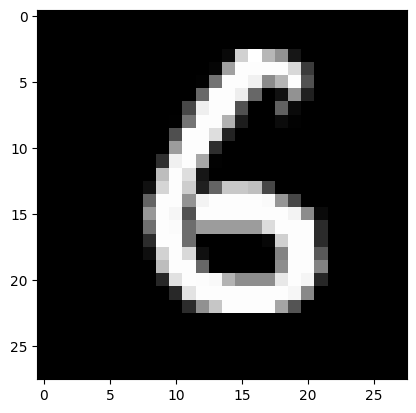

In [41]:
plt.imshow(test_image.reshape(28,28), cmap='gray');

In [43]:
test_data = X_test[random].reshape(1,28,28,1)
probability = model.predict(test_data)
probability

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


array([[0.0867682 , 0.04113882, 0.1090849 , 0.1433639 , 0.08042694,
        0.13912173, 0.08457381, 0.08139163, 0.12588143, 0.10824865]],
      dtype=float32)

In [44]:
predicted_classes = np.argmax(probability)
predicted_classes

np.int64(3)

In [45]:
print(f'Predicted class: {predicted_classes}')
print(f'Predicted class probability value: {(np.argmax(probability, axis=-1))[0]}')
print(f'Probability values of other classes: \n{probability}')

Predicted class: 3
Predicted class probability value: 3
Probability values of other classes: 
[[0.0867682  0.04113882 0.1090849  0.1433639  0.08042694 0.13912173
  0.08457381 0.08139163 0.12588143 0.10824865]]
